In [1]:
'''
Detailed description of PCA has been given in PCA_SimpleExample code. Please refer to that. 
'''
# Import Required Libraries
import numpy
from matplotlib import pyplot as plt
from LoadData import load_images, load_labels
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load Data, Normalise data to have zero mean
# Calculate Sample Covariance Matrix and Eigen Values & Eigen Vectors for that
Images = load_images('train-images-idx3-ubyte.gz')
Labels_Train = load_labels('train-labels-idx1-ubyte.gz')
Mean = numpy.mean(Images, axis=0)
Images_Norm = Images - Mean
row, col = Images.shape
Sample_Cov_Matrix = numpy.matmul(Images_Norm.T, Images_Norm)/(row - 1)
Eigen_Values, Eigen_Vectors = numpy.linalg.eig(Sample_Cov_Matrix)

In [3]:
# Reduce the 784 dimensional MNIST dataset to D (= 1, 2, ....) dimension
# Re-construct the original dataset using "reduced" dataset
K = col
D = 2 # Since x is 784 vector i.e. K = 784
Sort_Index = numpy.argsort(Eigen_Values)[::-1]
U = Eigen_Vectors[:, Sort_Index]
U_reduced = U[:, 0:D]
PC_Proj = numpy.matmul(U_reduced.T, Images_Norm.T)
Images_Prime = numpy.matmul(PC_Proj.T, U_reduced.T)

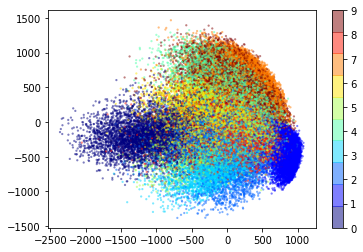

In [4]:
# Plotting the reduced data in 2D and 3D
if D == 2:
    plt.scatter(PC_Proj[0, :], PC_Proj[1, :], c=Labels_Train, edgecolor='none', alpha=0.5, cmap=plt.get_cmap('jet', 10), s=5)
    plt.colorbar()
    plt.savefig('PCA_MNIST_Reduced_2D.pdf')
    plt.show()
elif D == 3:
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    s = ax.scatter(PC_Proj[0, :], PC_Proj[1, :], PC_Proj[2, :], c=Labels_Train, edgecolor='none', alpha=0.5, cmap=plt.get_cmap('jet', 10), s=5)
    fig.colorbar(s)
    plt.savefig('PCA_MNIST_Reduced_3D.pdf')
    plt.show()

In [ ]:
# Plot showing the cumulative variance.
Significance = [numpy.abs(i)/numpy.sum(Eigen_Values) for i in Eigen_Values]
x = numpy.arange(1, K+1)
y = numpy.cumsum(Significance)
plt.plot(x, y)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

In [ ]:
# Scree Plot showing Variance of each Principal Component
plt.plot(x, Significance)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()